# Penguin Species Dataset
- Datasetet som jag valde hittade jag på Kaggle och det handlar om olika arter av pingviner på Antarktis
- Det har 9 kolumner och 344 rader

Jag valde detta dataset för att jag ville veta hur stor skillnad det är mellan pingvinarter, och om man då kan särskilja dom med bara hjälp av näbb och vinge. Det kändes också som ett dataset som är passade mitt huvud med logik och förståelse.

#### Här kommer mina första tankar om vad jag ska göra

## Kan man få ut vilken art det är med hjälp av bill_legnth_mm, bill_depth_mm, flipper_length_mm, möjligvtis body_mass_g?

- bill_legnth_mm = pingvinens näbb (beak) längd
- bill_depth_mm = pingvinens näbb höjd
- flipper_length_mm = pingvinens ving längd
- body_mass_g = pingvinens vikt

#### Måtten är i millimeter (mm) och gram (g)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('penguins.csv')

df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
df.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

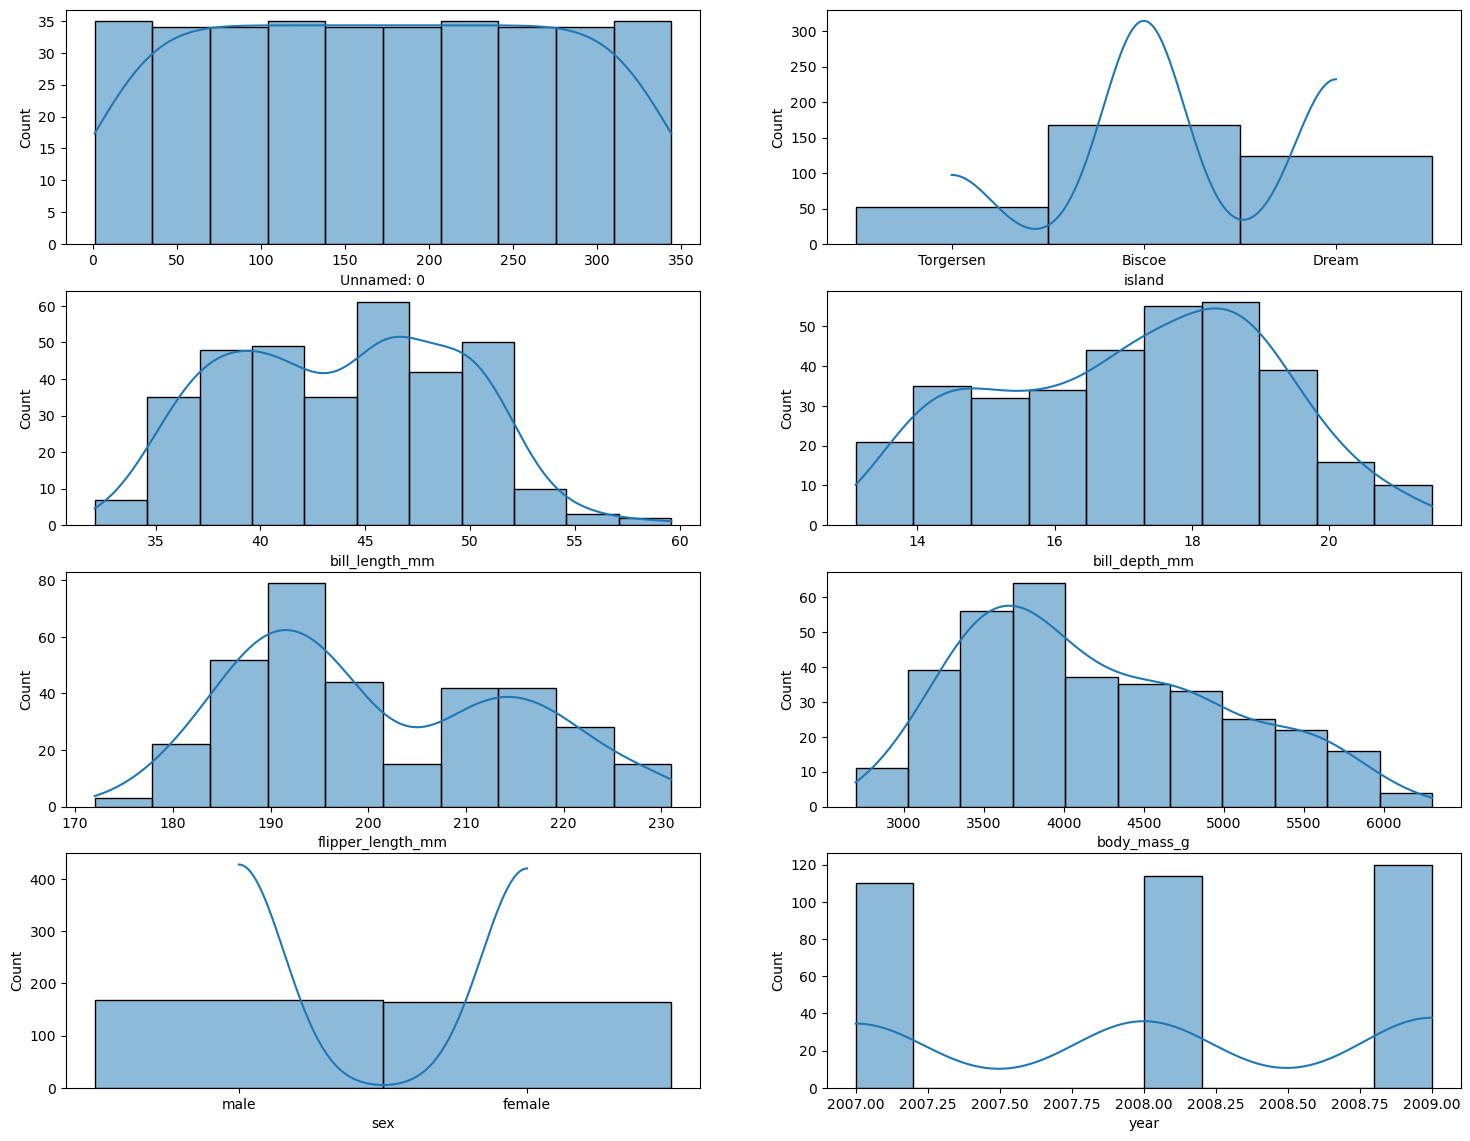

In [6]:
first_features = df.columns.drop("species")

n_features = len(first_features)
n_cols = 2
n_rows = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize = (18,14))

for i, first_feature in enumerate(first_features):
    row = i // n_cols
    col = i % n_cols

    feature_data = df[first_feature].dropna()

    sns.histplot(feature_data, kde = True, ax = axes[row,col])

plt.show()

    

#### Nu tror jag att jag vill ta bort, unnamed (eftersom det bara är ett id som tilldelats), island, sex och year.

##### Efter att ha tittat på histogrammen så vill jag ha med body_mass_g eftersom den ser ut som ett bra diagram. Men allt kan ändras efter heatmap och scatterplot

In [7]:
from sklearn.preprocessing import LabelEncoder

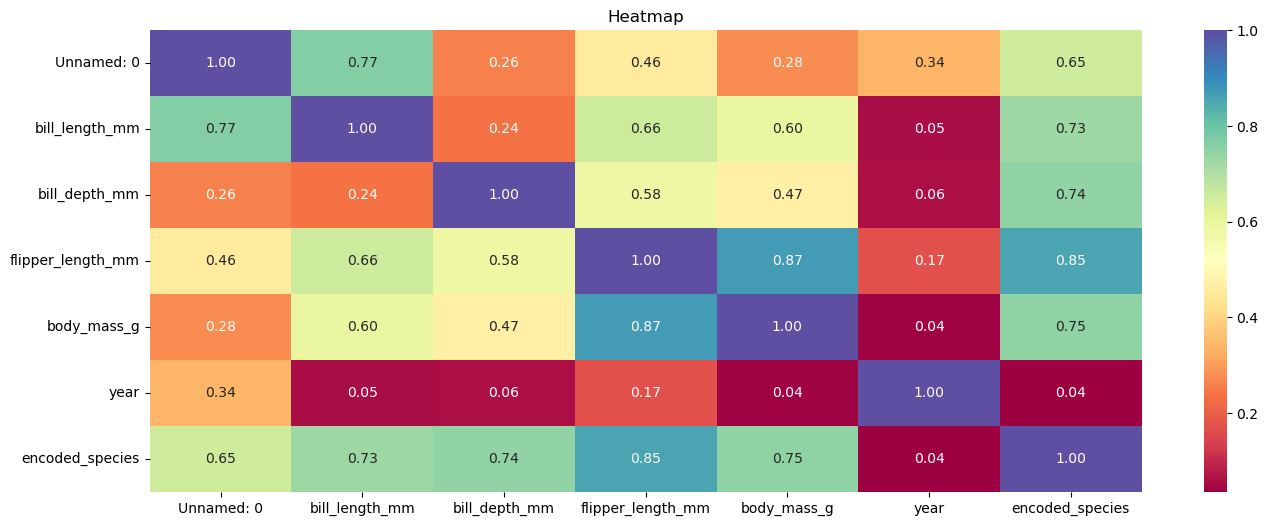

encoded_species      1.000000
flipper_length_mm    0.854307
body_mass_g          0.750491
bill_depth_mm        0.744076
bill_length_mm       0.731369
Unnamed: 0           0.649779
year                 0.035150
Name: encoded_species, dtype: float64


In [8]:
label_encoder = LabelEncoder()

df['encoded_species'] = label_encoder.fit_transform(df['species'])

numeric_df = df.select_dtypes(include = [np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize = (16,6))
sns.heatmap(correlation_matrix.abs(), annot = True, fmt = '0.2f', cmap = 'Spectral')
plt.title("Heatmap")
plt.show()

print(correlation_matrix['encoded_species'].abs().sort_values (ascending = False))

##### Jag har valt bort kolumner som innehöll strängar eftersom jag ändå inte var intresserad av Island. Och species gjorde jag om till en egen numerisk kategori så jag kunde få med den i min heatmap
##### Jag droppar all data som var NaN i min first_features

#### Jag ser att de med högsta korrelation är dom kolumner jag var intressad av. Så mitt nästa steg blir att göra scatterplot på bill_length_mm, bill_depth_mm, flipper_length_mm och body_mass_g

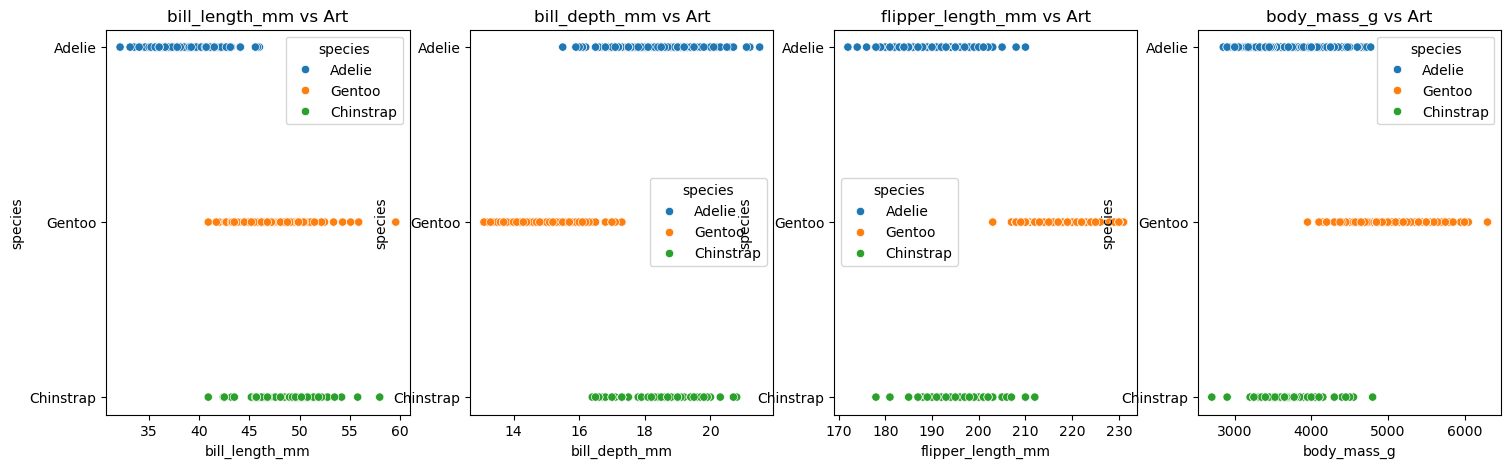

In [9]:
second_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df = df.dropna(subset = second_features + ['species'])

fig, axes = plt.subplots(1, 4, figsize = (18,5))

for i, feature in enumerate(second_features):
    sns.scatterplot(x = df[feature], y = df['species'], hue = df['species'], ax = axes[i])
    axes[i].set_title(f'{feature} vs Art')

plt.show()

#### Inte nöjd med mina scatterplots eftersom den skriver ut alla mina arter som tre rader, vilket gör det svårt och jämnföra. Då göra jag istället en pairplot som är en mix av heatmap och scatterplot (tycker jag) eftsom man kan jämnföra alla med varandra och då se hur det är utspritt.

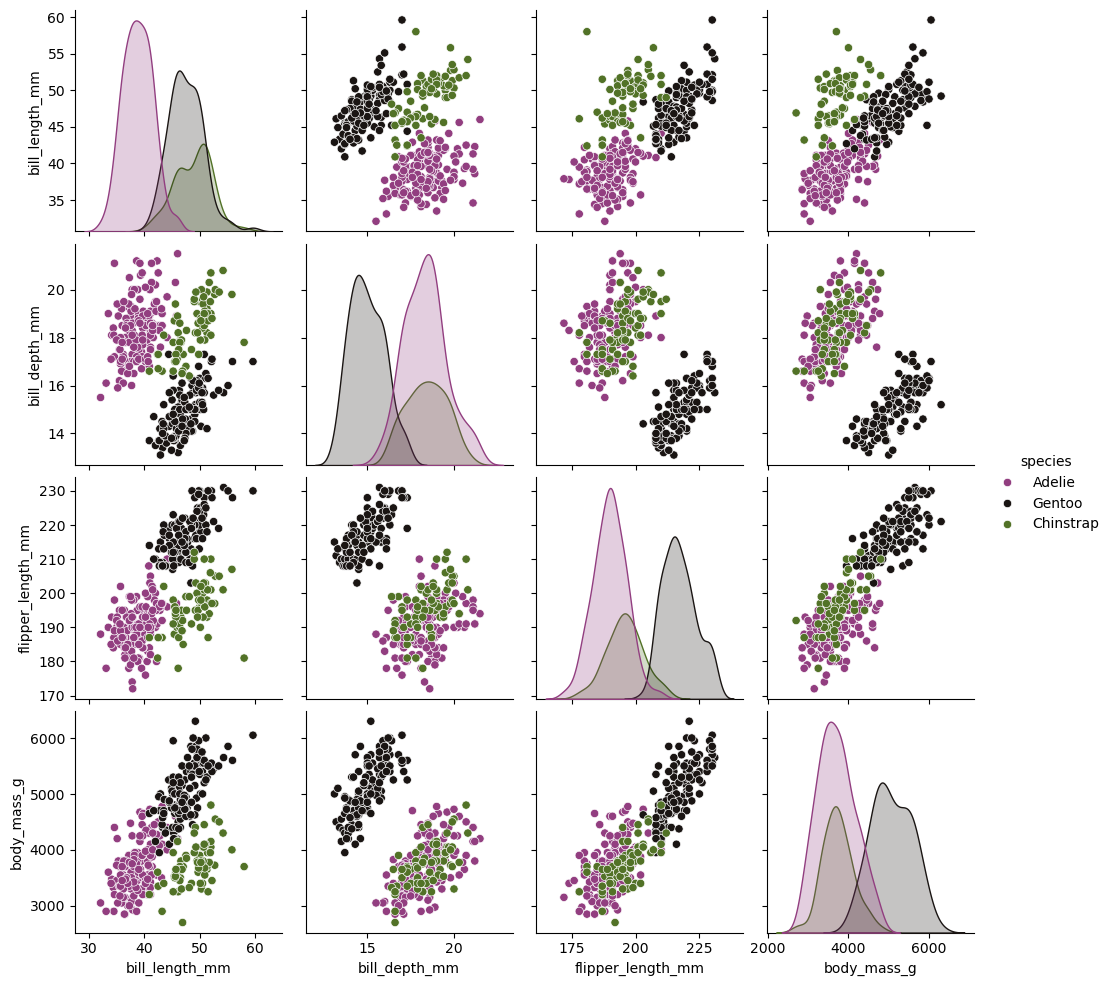

In [10]:
sns.pairplot(df, vars = second_features, hue = "species", diag_kind = 'kde', palette = 'vanimo')

plt.show()

#### Man ser att arten Gentoo är den som skiljer sig tydligast från dom andra, Adelie och Chinstrap är mer liknande varandra och håller sig ofta på samma plats

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [12]:
drop_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_clean = df.dropna(subset = drop_cols + ['species'])

third_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
fourth_features = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g']
fifth_features = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
sixth_features = ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
seventh_features = ['bill_length_mm', 'body_mass_g']

In [13]:
#x = df[second_features]
#x = df_clean[third_features]
#x = df_clean[fourth_features]
x = df_clean[fifth_features]
#x = df_clean[sixth_features]
#x = df_clean[seventh_features]
y = df_clean['species']

y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

linear_model = LinearRegression()

linear_model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score

In [15]:
y_predict = linear_model.predict(x_test_scaled)

y_true = y_test

mse = mean_squared_error(y_test, y_predict)

rmse = mse ** 0.5

r2 = r2_score(y_test, y_predict)


print(f'Rmse: {rmse:.2f}')
print(f'R2: {r2:.2f}')

Rmse: 0.44
R2: 0.76


#### Det bästa resultatet var second_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] och third_features ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
##### Men dom hade exakt samma värde så det är något som är mysko..

##### Provade även med kombinationer: fourth_features = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g'], fifth_features = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'], sixth_features = ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] och seventh_features ['bill_length_mm', 'body_mass_g']

- Second: Rmse: 0.26 | R2: 0.92
- Third: Rmse: 0.26 | R2: 0.92
- Fourth: Rmse: 0.28 | R2: 0.91
- Fifth: Rmse: 0.44 | R2: 0.76
- Sixth: Rmse: 0.37 | R2: 0.83
- Seventh: Rmse: 0.55 | R2: 0.63

#### Nedan kommer RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)

model_forest.fit(x_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_predict = model_forest.predict(x_test_scaled)



accuracy = accuracy_score(y_test, y_predict)

f1 = f1_score(y_test, y_predict, average = 'weighted')

print(f'Accuracy: {accuracy:.5f}')
print(f'F1: {f1:.5}')

Accuracy: 0.98551
F1: 0.98572


### RandomForestClassifier
#### Använder classifier eftersom vad jag vill få ut arten och inte ett nummer som till exempel vikten på pingvinen.

#### Alla värden jag fick:
- Second: Accuracy: 0.97101 | F1: 0.9718
- Third: Accuracy 0.97101 | F1: 0.9718
- Fourth: Accuracy: 0.97101 | F1: 0.9718
- Fifth: Accuracy: 0.98551 | F1: 0.98572
- Sixth: Accuracy: 0.76812 | F1: 0.77437
- Seventh: Accuracy: 0.91304 | F1: 0.91285]

#### Bäst siffror av alla fick jag med RandomForest med fifth_feature = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'] med nästan 0.99 på accuracy och F1

##### Second, third (igen) och fourth har alla samma värde vilket skumt! Men eftersom jag fått så bra siffror på Fifth väljer jag att fortsätta med den

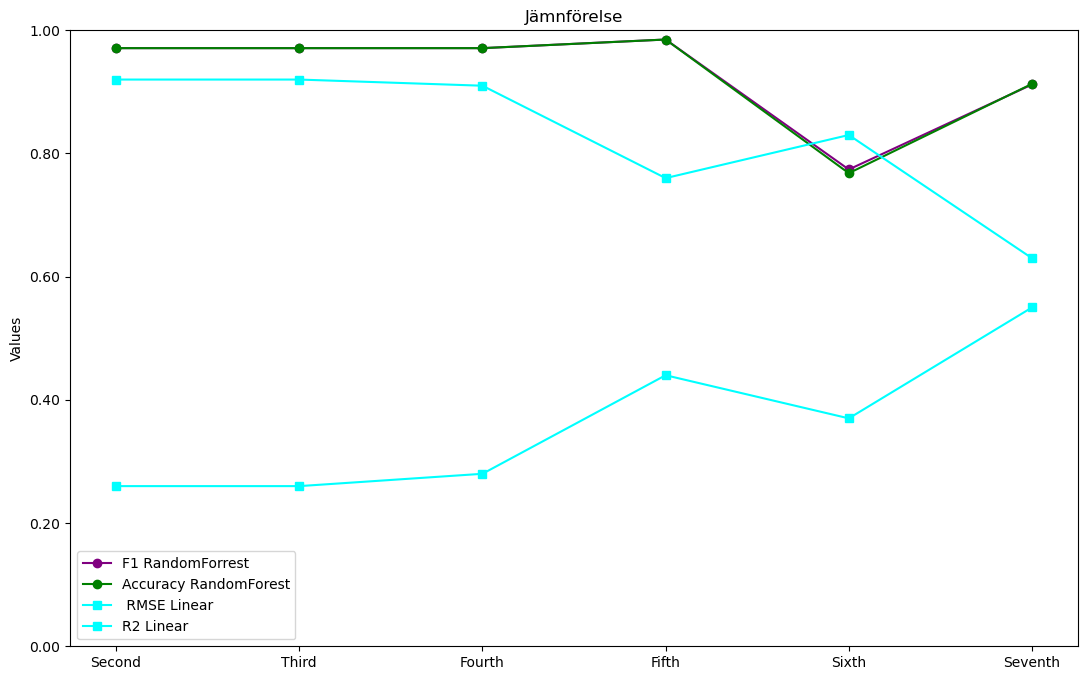

In [19]:
import matplotlib.ticker as ticker #till för att få ut mer decimaler

visuell_model = ["Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh"]
f1_forest_values = [0.971, 0.971, 0.971, 0.985, 0.774, 0.912]
accuracy_forest_values = [0.971, 0.971, 0.971, 0.985, 0.768, 0.913]

                     

rmse_linear_values = [0.26, 0.26, 0.28, 0.44, 0.37, 0.55]
r2_linear_values = [0.92, 0.92, 0.91, 0.76, 0.83, 0.63]


plt.figure(figsize = (13,8))

plt.plot(visuell_model, f1_forest_values, color = 'purple', marker = 'o', label = 'F1 RandomForrest')
plt.plot(visuell_model, accuracy_forest_values, color = 'green', marker = 'o', label = 'Accuracy RandomForest')
plt.plot(visuell_model, rmse_linear_values, color = 'cyan', marker = 's', label = ' RMSE Linear')
plt.plot(visuell_model, r2_linear_values, color = 'cyan', marker = 's', label = 'R2 Linear')
plt.title('Jämnförelse')
plt.ylabel('Values')
plt.ylim(0,1)
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


plt.show()

## En graf för att visuellt visa vilken dom två olika modellerna med olika resultat

#### Det är väldigt väldigt nära varandra i Accuracy och F1 men man kan se en liten topp på fifth_feature

In [20]:
import joblib


model_filename = 'penguins_topmodel.joblib'
joblib.dump(model_forest, model_filename)

scaler_filename = 'penguins_scalers.joblib'
joblib.dump(scaler, scaler_filename)


label_filename = 'penguins_label_encoder.joblib'
joblib.dump(label_encoder, label_filename)

['penguins_label_encoder.joblib']